In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

C:\Users\GDeLuca\AppData\Roaming\Python\Python37\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\GDeLuca\AppData\Roaming\Python\Python37\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\GDeLuca\AppData\Roaming\Python\Python37\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# Thank you University of Graz for this cell!!!
# Source: http://systems-sciences.uni-graz.at/etextbook/bigdata/sys_eval.html
with open('state_making_experiment-spreadsheet.csv','r') as handle:
    text = handle.readlines()
da = []

i = 0

def convert_to_nan(value):
    if value == '':
        value = np.NaN
    return value

for line in text:
    line = re.sub('"', " ", line)
    line = line.strip().split(",")
    if (i>5):
        line = map(convert_to_nan, line)
        da.append(line)
    i+=1
    
df = pd.DataFrame(da)
df
# The rest of the notebook from here onward is mine

,0,1,2,3,4,5,6,7,8,9,...,2391,2392,2393,2394,2395,2396,2397,2398,2399,2400
0,[run number],1,1,1,1,1,2,2,2,2,...,479,479,479,479,479,480,480,480,480,480
1,final-ticks,30,NaN,NaN,NaN,NaN,30,NaN,NaN,NaN,...,30,NaN,NaN,NaN,NaN,30,NaN,NaN,NaN,NaN
2,perception-range,40,NaN,NaN,NaN,NaN,40,NaN,NaN,NaN,...,60,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN
3,highlanders,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
4,number-individuals,100,NaN,NaN,NaN,NaN,100,NaN,NaN,NaN,...,100,NaN,NaN,NaN,NaN,100,NaN,NaN,NaN,NaN
5,speed,5,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,...,7,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN
6,variance-of-preferences,0.02,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,...,0.4,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN,NaN
7,[steps],27,27,27,27,27,22,22,22,22,...,25,25,25,25,25,20,20,20,20,20
8,NaN,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,[initial & final values],count individuals,refugees,ticks,highlander-victory?,referendum,count individuals,refugees,ticks,highlander-victory?,...,count individuals,refugees,ticks,highlander-victory?,referendum,count individuals,refugees,ticks,highlander-victory?,referendum


In [3]:
df.drop(8,axis=0,inplace=True)
df = df.T
df.drop(0,axis=0, inplace=True)
df

,0,1,2,3,4,5,6,7,9,10
1,1,30,40,1,100,5,0.02,27,count individuals,73
2,1,NaN,NaN,NaN,NaN,NaN,NaN,27,refugees,24
3,1,NaN,NaN,NaN,NaN,NaN,NaN,27,ticks,27
4,1,NaN,NaN,NaN,NaN,NaN,NaN,27,highlander-victory?,true
5,1,NaN,NaN,NaN,NaN,NaN,NaN,27,referendum,-0.00397071673244339
...,...,...,...,...,...,...,...,...,...,...
2396,480,30,60,2,100,7,0.4,20,count individuals,60
2397,480,NaN,NaN,NaN,NaN,NaN,NaN,20,refugees,41
2398,480,NaN,NaN,NaN,NaN,NaN,NaN,20,ticks,20
2399,480,NaN,NaN,NaN,NaN,NaN,NaN,20,highlander-victory?,true


In [4]:
df.columns = ['run-number','final-ticks','perception-range','highlanders',
              'number-individuals','speed','variance-of-preferences',
              'steps','initial-and-final-values','values']
df

,run-number,final-ticks,perception-range,highlanders,number-individuals,speed,variance-of-preferences,steps,initial-and-final-values,values
1,1,30,40,1,100,5,0.02,27,count individuals,73
2,1,NaN,NaN,NaN,NaN,NaN,NaN,27,refugees,24
3,1,NaN,NaN,NaN,NaN,NaN,NaN,27,ticks,27
4,1,NaN,NaN,NaN,NaN,NaN,NaN,27,highlander-victory?,true
5,1,NaN,NaN,NaN,NaN,NaN,NaN,27,referendum,-0.00397071673244339
...,...,...,...,...,...,...,...,...,...,...
2396,480,30,60,2,100,7,0.4,20,count individuals,60
2397,480,NaN,NaN,NaN,NaN,NaN,NaN,20,refugees,41
2398,480,NaN,NaN,NaN,NaN,NaN,NaN,20,ticks,20
2399,480,NaN,NaN,NaN,NaN,NaN,NaN,20,highlander-victory?,true


In [5]:
columns = df['initial-and-final-values'].unique()
mapping = {' count individuals ':'count-individuals',
           ' refugees ':'refugees',
           ' ticks ':'ticks',
       ' highlander-victory? ':'highlander-victory?',
           ' referendum ':'referendum', 
           ' referendum':'referendum'}
new_columns = []
for element in columns:
    new_columns.append(mapping[element])

In [6]:
new_columns

['count-individuals',
 'refugees',
 'ticks',
 'highlander-victory?',
 'referendum',
 'referendum']

In [7]:
df2 = pd.DataFrame(np.zeros((480,5)))
df2.columns = new_columns[:-1]
df2.index = pd.RangeIndex(start=1,stop=481, step=1)
df2['highlander-victory?'] = df2['highlander-victory?'].astype(bool)
df2

,count-individuals,refugees,ticks,highlander-victory?,referendum
1,0.0,0.0,0.0,False,0.0
2,0.0,0.0,0.0,False,0.0
3,0.0,0.0,0.0,False,0.0
4,0.0,0.0,0.0,False,0.0
5,0.0,0.0,0.0,False,0.0
...,...,...,...,...,...
476,0.0,0.0,0.0,False,0.0
477,0.0,0.0,0.0,False,0.0
478,0.0,0.0,0.0,False,0.0
479,0.0,0.0,0.0,False,0.0


In [8]:
df['run-number'] = df['run-number'].apply(int)
df.tail()

,run-number,final-ticks,perception-range,highlanders,number-individuals,speed,variance-of-preferences,steps,initial-and-final-values,values
2396,480,30,60,2,100,7,0.4,20,count individuals,60
2397,480,NaN,NaN,NaN,NaN,NaN,NaN,20,refugees,41
2398,480,NaN,NaN,NaN,NaN,NaN,NaN,20,ticks,20
2399,480,NaN,NaN,NaN,NaN,NaN,NaN,20,highlander-victory?,true
2400,480,NaN,NaN,NaN,NaN,NaN,NaN,20,referendum,-0.07819542722249911


In [9]:
truth_dictionary = {'true':1,'false':0}

for run_number in range(1, 481):
    print(f'Run number {run_number}')
    group = df[df['run-number']==run_number]
    for row in group.iterrows():

        current_variable = mapping[row[1]['initial-and-final-values']]
        print(current_variable)
        if current_variable != 'highlander-victory?':
            value = float(row[1]['values'])  
            print(value)
            df2.loc[run_number,current_variable] = value
        else:
            value = truth_dictionary[row[1]['values'].strip()] 
            print(value)
            df2.loc[run_number,current_variable] = value

Run number 1
count-individuals
73.0
refugees
24.0
ticks
27.0
highlander-victory?
1
referendum
-0.00397071673244339
Run number 2
count-individuals
78.0
refugees
28.0
ticks
22.0
highlander-victory?
1
referendum
-0.0018031581420112014
Run number 3
count-individuals
69.0
refugees
23.0
ticks
31.0
highlander-victory?
0
referendum
0.01637396614753118
Run number 4
count-individuals
73.0
refugees
32.0
ticks
27.0
highlander-victory?
1
referendum
-0.002715184150397503
Run number 5
count-individuals
89.0
refugees
18.0
ticks
11.0
highlander-victory?
1
referendum
-0.0055705833166770245
Run number 6
count-individuals
81.0
refugees
19.0
ticks
19.0
highlander-victory?
1
referendum
-1.578850390552714e-05
Run number 7
count-individuals
80.0
refugees
24.0
ticks
20.0
highlander-victory?
1
referendum
-4.931931176815798e-05
Run number 8
count-individuals
74.0
refugees
34.0
ticks
26.0
highlander-victory?
1
referendum
-0.0007405168544189986
Run number 9
count-individuals
80.0
refugees
32.0
ticks
20.0
highlande

count-individuals
77.0
refugees
25.0
ticks
23.0
highlander-victory?
1
referendum
-0.16884317260758178
Run number 75
count-individuals
72.0
refugees
26.0
ticks
28.0
highlander-victory?
1
referendum
-0.119973111685823
Run number 76
count-individuals
90.0
refugees
25.0
ticks
10.0
highlander-victory?
1
referendum
-0.03211726698268811
Run number 77
count-individuals
72.0
refugees
36.0
ticks
28.0
highlander-victory?
1
referendum
-0.23936177309236095
Run number 78
count-individuals
81.0
refugees
27.0
ticks
19.0
highlander-victory?
1
referendum
-0.018410043855679094
Run number 79
count-individuals
69.0
refugees
39.0
ticks
31.0
highlander-victory?
0
referendum
0.20377583543512698
Run number 80
count-individuals
83.0
refugees
25.0
ticks
17.0
highlander-victory?
1
referendum
-0.05045295248426423
Run number 81
count-individuals
62.0
refugees
22.0
ticks
19.0
highlander-victory?
1
referendum
-0.002493345346361774
Run number 82
count-individuals
62.0
refugees
29.0
ticks
19.0
highlander-victory?
1
ref

15.0
highlander-victory?
1
referendum
-0.03619583249193286
Run number 148
count-individuals
80.0
refugees
22.0
ticks
10.0
highlander-victory?
1
referendum
-0.005378462053442468
Run number 149
count-individuals
60.0
refugees
29.0
ticks
20.0
highlander-victory?
1
referendum
-0.009202120615848273
Run number 150
count-individuals
66.0
refugees
22.0
ticks
17.0
highlander-victory?
1
referendum
-0.02124905277275285
Run number 151
count-individuals
54.0
refugees
31.0
ticks
23.0
highlander-victory?
1
referendum
-0.014732292433956733
Run number 152
count-individuals
66.0
refugees
21.0
ticks
17.0
highlander-victory?
1
referendum
-0.06647575548992805
Run number 153
count-individuals
66.0
refugees
30.0
ticks
17.0
highlander-victory?
1
referendum
-0.004618492968274595
Run number 154
count-individuals
66.0
refugees
33.0
ticks
17.0
highlander-victory?
1
referendum
-0.005233256993179618
Run number 155
count-individuals
82.0
refugees
18.0
ticks
9.0
highlander-victory?
1
referendum
-0.014181972027184069


count-individuals
75.0
refugees
48.0
ticks
25.0
highlander-victory?
1
referendum
-0.022838148296879118
Run number 222
count-individuals
77.0
refugees
51.0
ticks
23.0
highlander-victory?
1
referendum
-0.00033158012457680774
Run number 223
count-individuals
79.0
refugees
30.0
ticks
21.0
highlander-victory?
1
referendum
-0.0425061785599934
Run number 224
count-individuals
69.0
refugees
40.0
ticks
31.0
highlander-victory?
0
referendum
0.12559083398666926
Run number 225
count-individuals
80.0
refugees
41.0
ticks
20.0
highlander-victory?
1
referendum
-0.06208413076249808
Run number 226
count-individuals
76.0
refugees
40.0
ticks
24.0
highlander-victory?
1
referendum
-0.07758836768700186
Run number 227
count-individuals
69.0
refugees
40.0
ticks
31.0
highlander-victory?
0
referendum
0.11838048117075428
Run number 228
count-individuals
78.0
refugees
41.0
ticks
22.0
highlander-victory?
1
referendum
-0.03036459830450783
Run number 229
count-individuals
72.0
refugees
40.0
ticks
28.0
highlander-vict

72.0
refugees
25.0
ticks
14.0
highlander-victory?
1
referendum
-0.017930758439932963
Run number 293
count-individuals
64.0
refugees
41.0
ticks
18.0
highlander-victory?
1
referendum
-0.016240511567356196
Run number 294
count-individuals
70.0
refugees
37.0
ticks
15.0
highlander-victory?
1
referendum
-0.02770718069438941
Run number 295
count-individuals
74.0
refugees
29.0
ticks
13.0
highlander-victory?
1
referendum
-0.020637421463109682
Run number 296
count-individuals
78.0
refugees
25.0
ticks
11.0
highlander-victory?
1
referendum
-2.01282187737618e-05
Run number 297
count-individuals
64.0
refugees
38.0
ticks
18.0
highlander-victory?
1
referendum
-0.01702887025732288
Run number 298
count-individuals
54.0
refugees
29.0
ticks
23.0
highlander-victory?
1
referendum
-0.009229494786894997
Run number 299
count-individuals
50.0
refugees
33.0
ticks
25.0
highlander-victory?
1
referendum
-0.0641826758803075
Run number 300
count-individuals
52.0
refugees
38.0
ticks
24.0
highlander-victory?
1
referend

22.0
highlander-victory?
1
referendum
-0.002545950060293757
Run number 365
count-individuals
69.0
refugees
44.0
ticks
31.0
highlander-victory?
1
referendum
-0.008574130985745634
Run number 366
count-individuals
69.0
refugees
57.0
ticks
31.0
highlander-victory?
0
referendum
0.00815406062007191
Run number 367
count-individuals
69.0
refugees
53.0
ticks
31.0
highlander-victory?
0
referendum
0.05674811191193301
Run number 368
count-individuals
85.0
refugees
28.0
ticks
15.0
highlander-victory?
1
referendum
-0.002465516458408588
Run number 369
count-individuals
82.0
refugees
33.0
ticks
18.0
highlander-victory?
1
referendum
-0.0018047144737457707
Run number 370
count-individuals
69.0
refugees
45.0
ticks
31.0
highlander-victory?
0
referendum
0.01268463661677637
Run number 371
count-individuals
69.0
refugees
38.0
ticks
31.0
highlander-victory?
0
referendum
0.04260231233889898
Run number 372
count-individuals
69.0
refugees
50.0
ticks
31.0
highlander-victory?
0
referendum
0.03294223864900742
Run n

count-individuals
66.0
refugees
38.0
ticks
17.0
highlander-victory?
1
referendum
-0.008183652078170834
Run number 443
count-individuals
60.0
refugees
39.0
ticks
20.0
highlander-victory?
1
referendum
-0.0007375640020914554
Run number 444
count-individuals
72.0
refugees
31.0
ticks
14.0
highlander-victory?
1
referendum
-0.0008332935200066813
Run number 445
count-individuals
62.0
refugees
36.0
ticks
19.0
highlander-victory?
1
referendum
-0.0041963171521057835
Run number 446
count-individuals
64.0
refugees
46.0
ticks
18.0
highlander-victory?
1
referendum
-0.009045588334472979
Run number 447
count-individuals
54.0
refugees
45.0
ticks
23.0
highlander-victory?
1
referendum
-0.0070148259910869475
Run number 448
count-individuals
44.0
refugees
37.0
ticks
28.0
highlander-victory?
1
referendum
-0.010378980626136335
Run number 449
count-individuals
58.0
refugees
47.0
ticks
21.0
highlander-victory?
1
referendum
-0.009916867368114786
Run number 450
count-individuals
54.0
refugees
37.0
ticks
23.0
high

In [10]:
df2

,count-individuals,refugees,ticks,highlander-victory?,referendum
1,73.0,24.0,27.0,1,-0.003971
2,78.0,28.0,22.0,1,-0.001803
3,69.0,23.0,31.0,0,0.016374
4,73.0,32.0,27.0,1,-0.002715
5,89.0,18.0,11.0,1,-0.005571
...,...,...,...,...,...
476,68.0,46.0,16.0,1,-0.005958
477,62.0,44.0,19.0,1,-0.126675
478,50.0,46.0,25.0,1,-0.077065
479,50.0,42.0,25.0,1,-0.132259


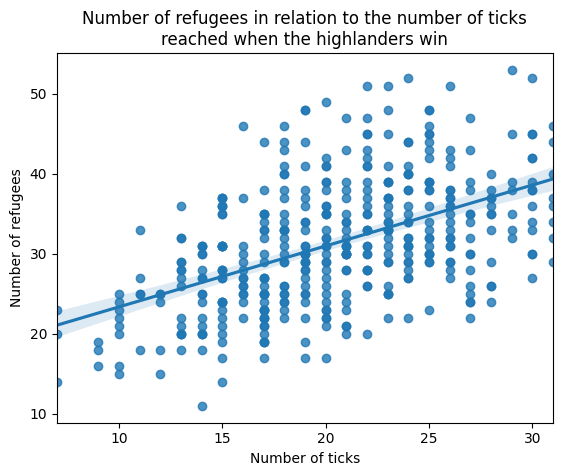

In [11]:
import seaborn as sns
mask = df2['highlander-victory?'] == True

sns.regplot(x=df2[mask]['ticks'],y=df2[mask]['refugees'])

# mask = df2['highlander-victory?'] == False

# plt.scatter(df2[mask]['refugees'],df2[mask]['ticks'])

plt.xlabel('Number of ticks')
plt.ylabel('Number of refugees')
plt.title('Number of refugees in relation to the number of ticks\nreached when the highlanders win')
plt.show()

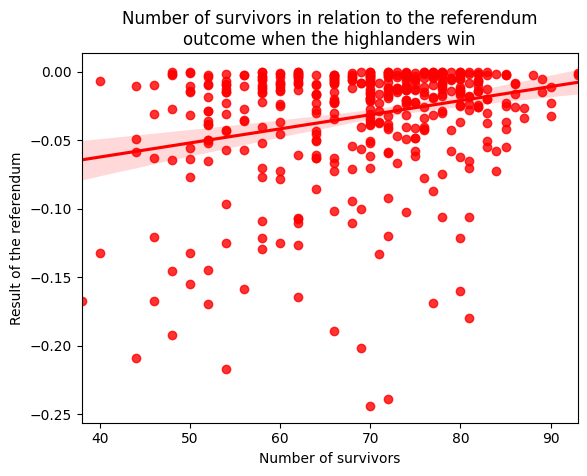

In [12]:
import seaborn as sns
mask = df2['highlander-victory?'] == True

sns.regplot(x=df2[mask]['count-individuals'],y=df2[mask]['referendum'],color='r')

# mask = df2['highlander-victory?'] == False

# plt.scatter(df2[mask]['refugees'],df2[mask]['ticks'])

plt.xlabel('Number of survivors')
plt.ylabel('Result of the referendum')
plt.title('Number of survivors in relation to the referendum\noutcome when the highlanders win')
plt.show()

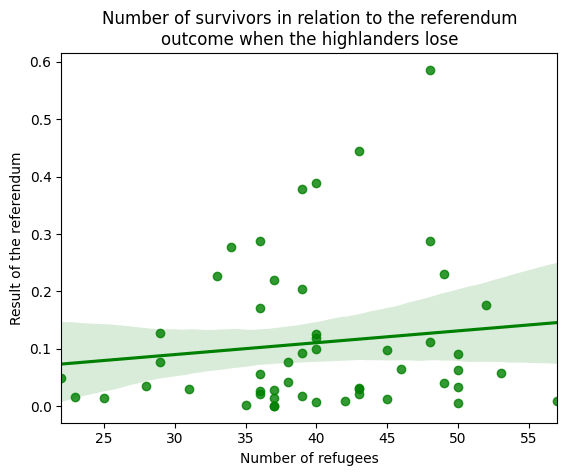

In [13]:
import seaborn as sns
mask = df2['highlander-victory?'] == False

sns.regplot(x=df2[mask]['refugees'],y=df2[mask]['referendum'],color='g')

# mask = df2['highlander-victory?'] == False

# plt.scatter(df2[mask]['refugees'],df2[mask]['ticks'])

plt.xlabel('Number of refugees')
plt.ylabel('Result of the referendum')
plt.title('Number of survivors in relation to the referendum\noutcome when the highlanders lose')
plt.show()